# Predictive modelling for engine maintenance and Repair Prediction in Automotive Vehicles


# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

# Data Pre-processing

In [2]:
engine = pd.read_csv(r'C:\Users\Admin\Downloads\Sem 2\DAPA 2\engine_data.csv')
engine.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0


In [3]:
engine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
 6   Engine Condition  19535 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB


In [4]:
engine.duplicated().sum()

0

In [5]:
engine.dtypes

Engine rpm            int64
Lub oil pressure    float64
Fuel pressure       float64
Coolant pressure    float64
lub oil temp        float64
Coolant temp        float64
Engine Condition      int64
dtype: object

In [6]:
engine.describe()


,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
count,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000
mean,791.239263,3.303775,6.655615,2.335369,77.643420,78.427433,0.630509
std,267.611193,1.021643,2.761021,1.036382,3.110984,6.206749,0.482679
min,61.000000,0.003384,0.003187,0.002483,71.321974,61.673325,0.000000
25%,593.000000,2.518815,4.916886,1.600466,75.725990,73.895421,0.000000
50%,746.000000,3.162035,6.201720,2.166883,76.817350,78.346662,1.000000
75%,934.000000,4.055272,7.744973,2.848840,78.071691,82.915411,1.000000
max,2239.000000,7.265566,21.138326,7.478505,89.580796,195.527912,1.000000


In [7]:
engine['Engine Condition'] = engine['Engine Condition'].astype('category')

In [8]:
engine.dtypes

Engine rpm             int64
Lub oil pressure     float64
Fuel pressure        float64
Coolant pressure     float64
lub oil temp         float64
Coolant temp         float64
Engine Condition    category
dtype: object

# Exploratory Data Analysis

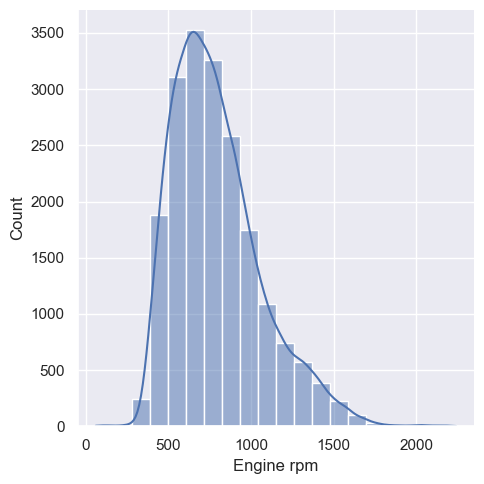

In [9]:
sns.displot(data=engine['Engine rpm'], bins= 20, kde= True)
plt.show()

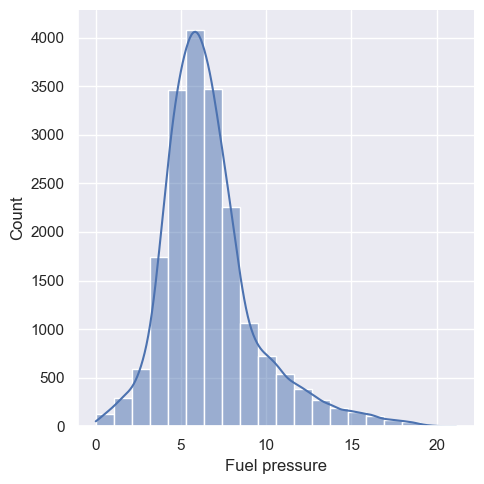

In [10]:
sns.displot(data=engine['Fuel pressure'], bins= 20, kde= True)
plt.show()

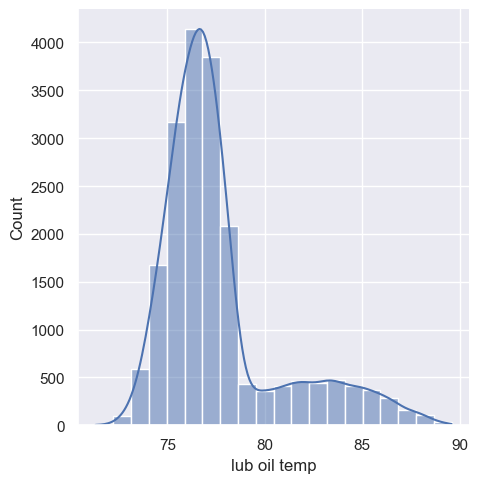

In [11]:
sns.displot(data=engine['lub oil temp'], bins= 20, kde= True)
plt.show()

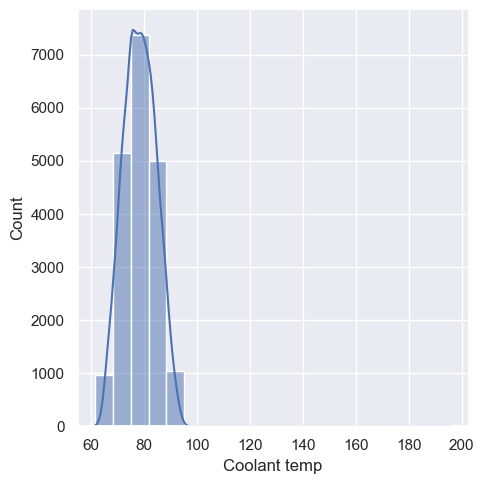

In [12]:
sns.displot(data=engine['Coolant temp'], bins= 20, kde= True)
plt.show()

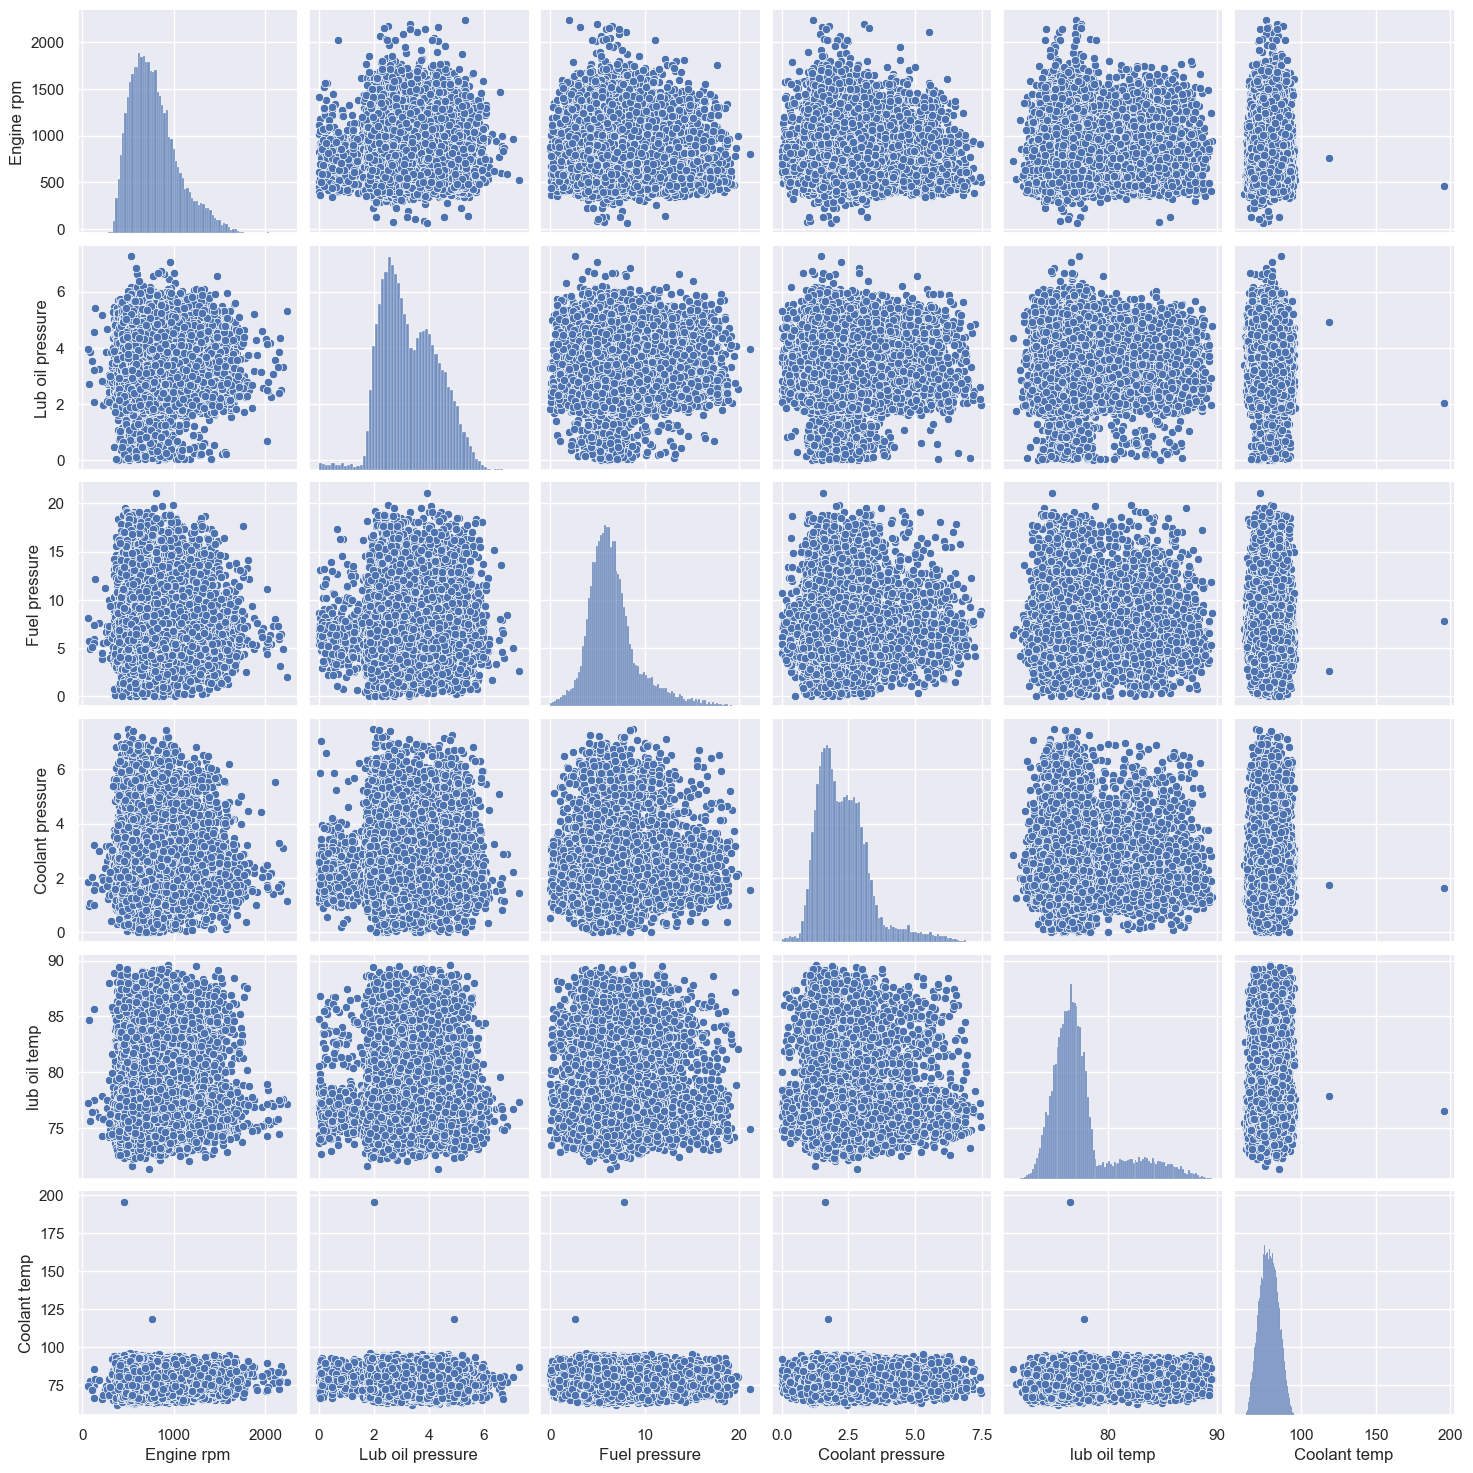

In [13]:
sns.pairplot(engine)

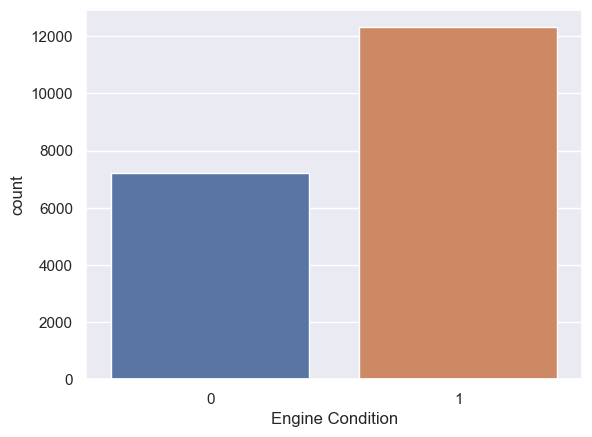

<Figure size 400x200 with 0 Axes>

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the countplot
sns.countplot(x=engine['Engine Condition'])

# Set the figure size to create a slim graph
plt.figure(figsize=(4, 2))

# Show the plot
plt.show()


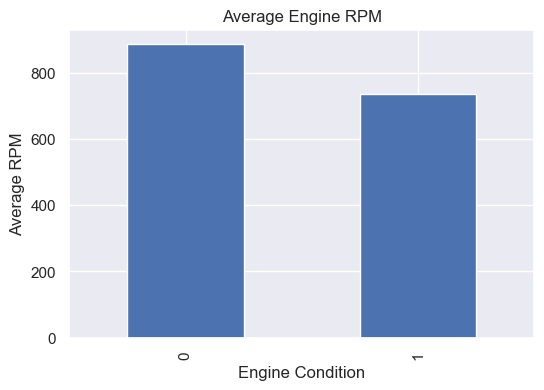

In [15]:
import matplotlib.pyplot as plt

# Group by 'Engine Condition' and calculate the mean of 'Engine rpm'
engine_condition_mean = engine.groupby('Engine Condition')['Engine rpm'].mean()

# Create the bar plot
engine_condition_mean.plot(kind='bar', width=0.5, figsize=(6, 4))

# Set the title and labels
plt.title('Average Engine RPM')
plt.xlabel('Engine Condition')
plt.ylabel('Average RPM')

# Show the plot
plt.show()


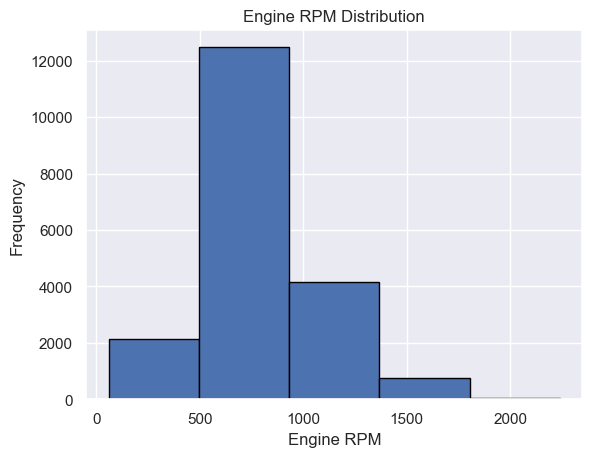

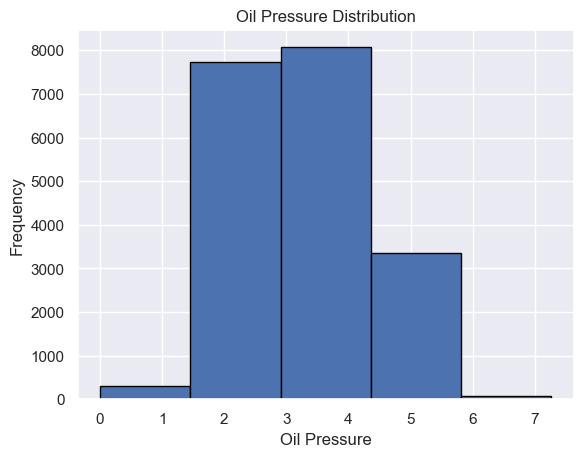

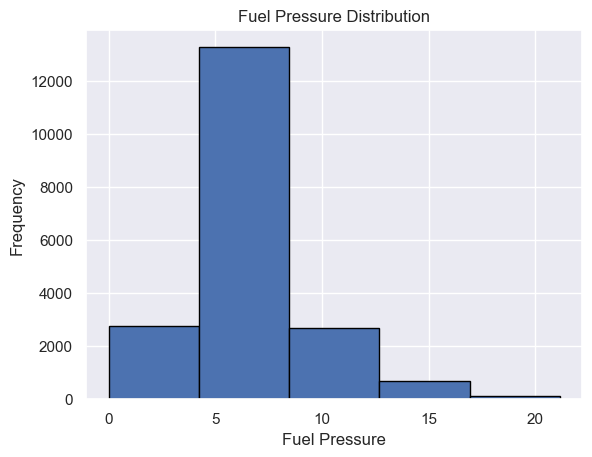

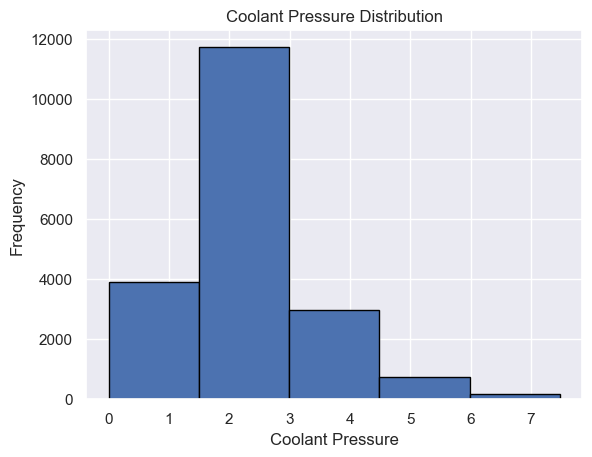

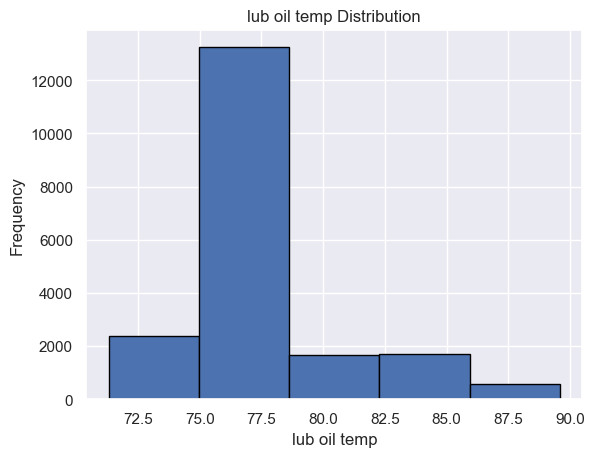

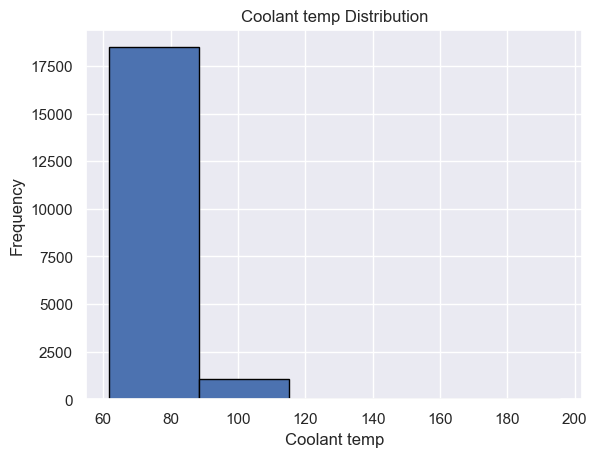

In [16]:
plt.hist(engine['Engine rpm'], bins=5, edgecolor='black')
plt.xlabel('Engine RPM')
plt.ylabel('Frequency')
plt.title('Engine RPM Distribution')
plt.show()

plt.hist(engine['Lub oil pressure'], bins=5, edgecolor='black')
plt.xlabel('Oil Pressure')
plt.ylabel('Frequency')
plt.title('Oil Pressure Distribution')
plt.show()

plt.hist(engine['Fuel pressure'], bins=5, edgecolor='black')
plt.xlabel('Fuel Pressure')
plt.ylabel('Frequency')
plt.title('Fuel Pressure Distribution')
plt.show()

plt.hist(engine['Coolant pressure'], bins=5, edgecolor='black')
plt.xlabel('Coolant Pressure')
plt.ylabel('Frequency')
plt.title('Coolant Pressure Distribution')
plt.show()

plt.hist(engine['lub oil temp'], bins=5, edgecolor='black')
plt.xlabel('lub oil temp')
plt.ylabel('Frequency')
plt.title('lub oil temp Distribution')
plt.show()

plt.hist(engine['Coolant temp'], bins=5, edgecolor='black')
plt.xlabel('Coolant temp')
plt.ylabel('Frequency')
plt.title('Coolant temp Distribution')
plt.show()



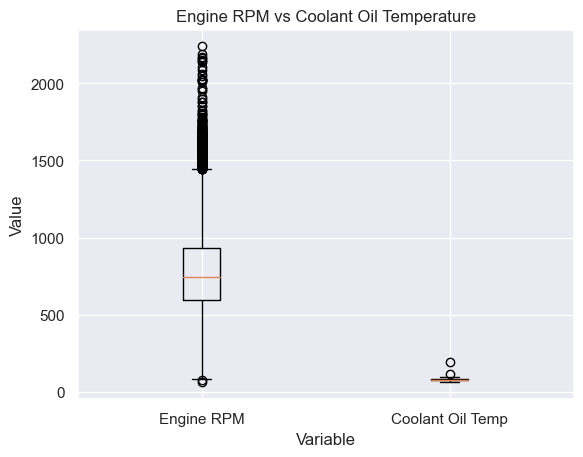

In [17]:
import matplotlib.pyplot as plt

data = [engine['Engine rpm'], engine['Coolant temp']]
plt.boxplot(data)
plt.xlabel('Variable')
plt.ylabel('Value')
plt.title('Engine RPM vs Coolant Oil Temperature')
plt.xticks([1, 2], ['Engine RPM', 'Coolant Oil Temp'])
plt.show()


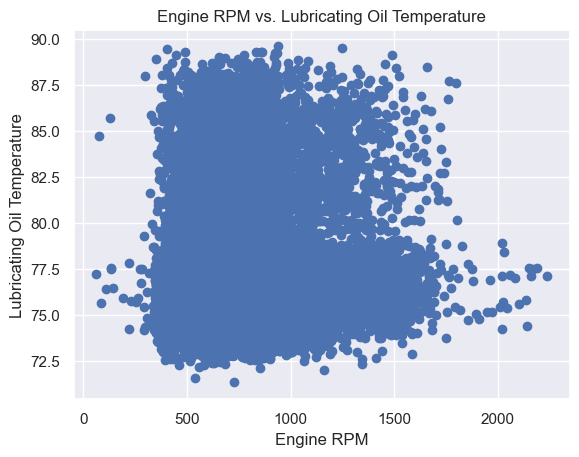

In [18]:
plt.scatter(engine['Engine rpm'],engine['lub oil temp'])
plt.xlabel('Engine RPM')
plt.ylabel('Lubricating Oil Temperature')
plt.title('Engine RPM vs. Lubricating Oil Temperature')
plt.show()


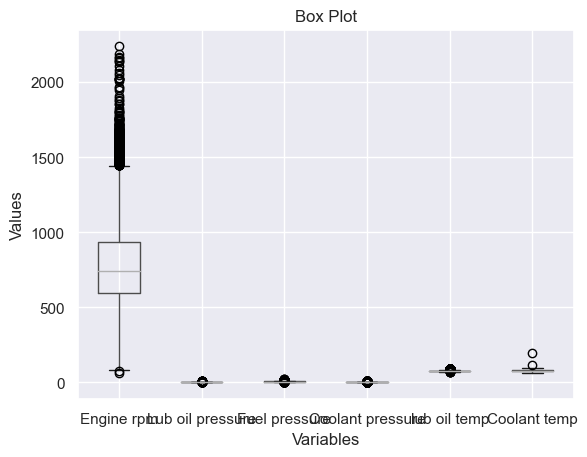

In [19]:
columns = ['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure', 'lub oil temp', 'Coolant temp']
# Create the box plot
engine.boxplot(column=columns)
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Box Plot')
plt.show()

In [20]:
list_Indpndt_features = [feature for feature in engine.columns if 'Engine Condition' not in feature ]
list_Indpndt_features

['Engine rpm',
 'Lub oil pressure',
 'Fuel pressure',
 'Coolant pressure',
 'lub oil temp',
 'Coolant temp']

In [21]:
engine.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0


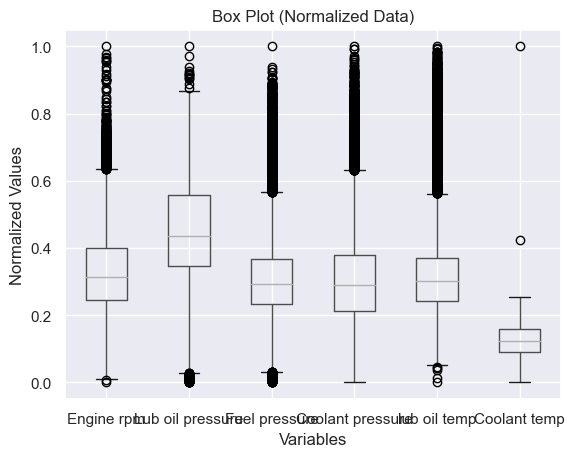

In [22]:
import matplotlib.pyplot as plt

import pandas as pd

from sklearn.preprocessing import MinMaxScaler

 

# Specify the columns for which you want to create a box plot

columns = ['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure','lub oil temp', 'Coolant temp']

 

# Normalize the data

scaler = MinMaxScaler()

normalized = pd.DataFrame(scaler.fit_transform(engine[columns]), columns=columns)

 

# Create the box plot

normalized.boxplot(column=columns)

plt.xlabel('Variables')

plt.ylabel('Normalized Values')

plt.title('Box Plot (Normalized Data)')

plt.show()

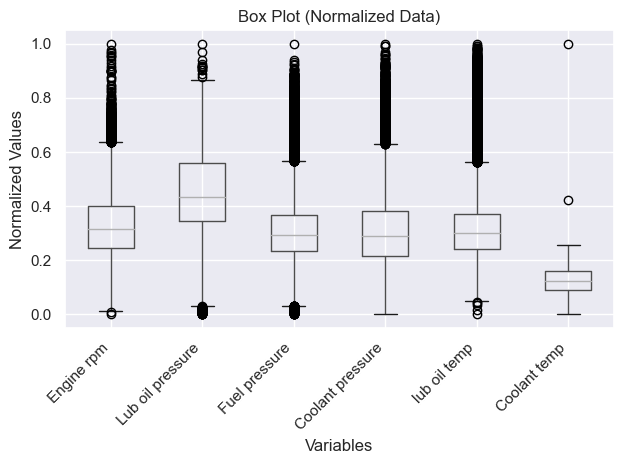

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

 

# Specify the columns for which you want to create a box plot
columns = ['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure','lub oil temp', 'Coolant temp']

 

# Normalize the data
scaler = MinMaxScaler()
normalized = pd.DataFrame(scaler.fit_transform(engine[columns]), columns=columns)

 

# Create the box plot
boxplot = normalized.boxplot(column=columns)
plt.xlabel('Variables')
plt.ylabel('Normalized Values')
plt.title('Box Plot (Normalized Data)')

 

# Rotate x-axis labels
boxplot.set_xticklabels(columns, rotation=45, ha='right')

 

plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show()



<AxesSubplot:>

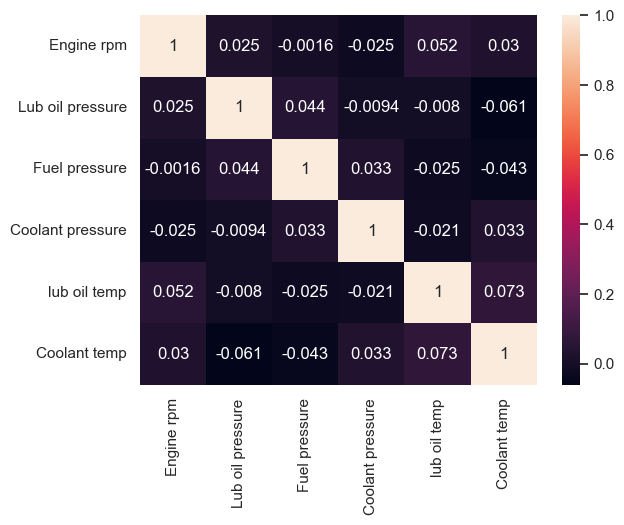

In [24]:
sns.heatmap(engine.corr(), annot=True)

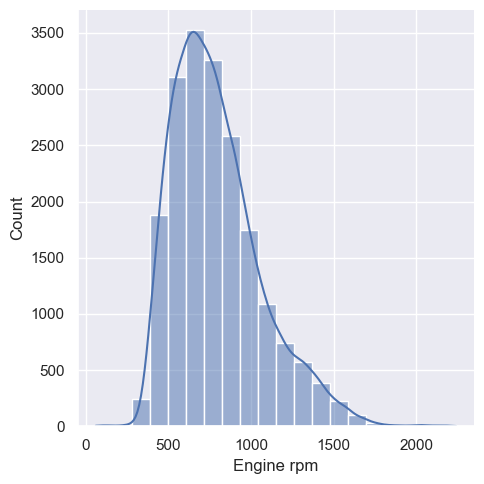

In [25]:
sns.displot(data=engine['Engine rpm'], bins= 20, kde= True)
plt.show()

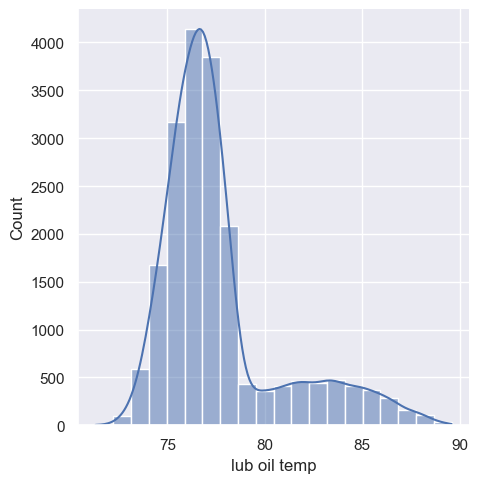

In [26]:
sns.displot(data=engine['lub oil temp'], bins= 20, kde= True)
plt.show()

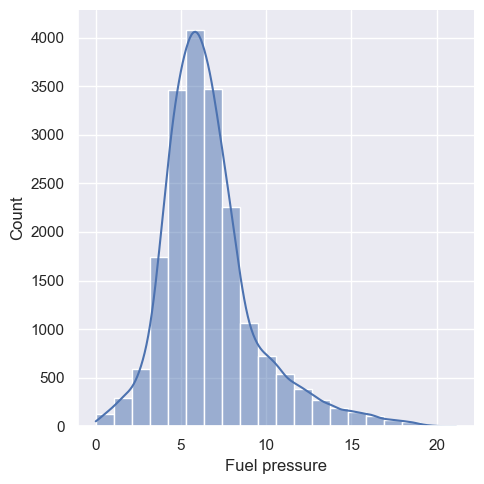

In [27]:
sns.displot(data=engine['Fuel pressure'], bins= 20, kde= True)
plt.show()

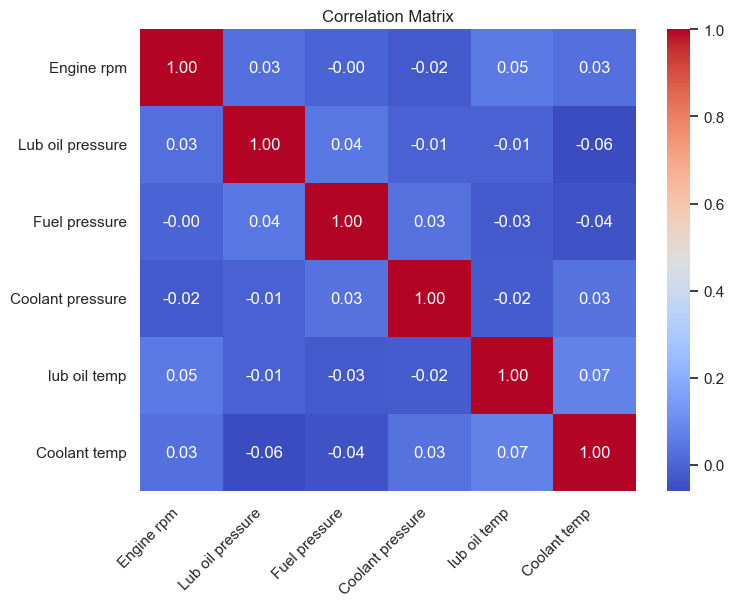

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = engine.corr()

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create a heatmap with correlation matrix
heatmap = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", ax=ax)

# Set the title
plt.title('Correlation Matrix')

# Rotate the x-axis tick labels for better readability
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')

# Show the plot
plt.show()


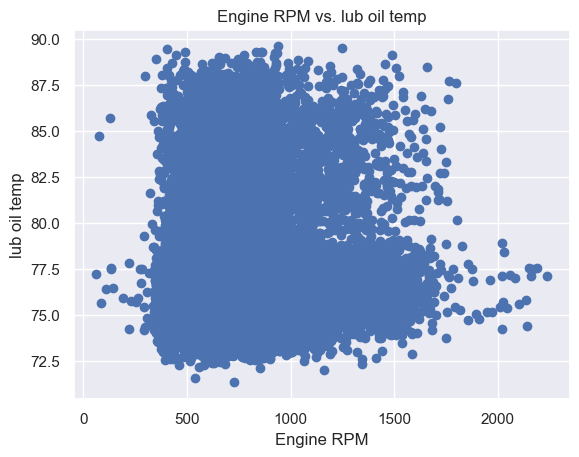

Correlation coefficient: 0.05
Engine RPM mean: 791.24
lub oil temp mean: 77.64
Engine RPM standard deviation: 267.61
lub oil temp standard deviation: 3.11


In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Scatter plot
plt.scatter(engine['Engine rpm'], engine['lub oil temp'])
plt.xlabel('Engine RPM')
plt.ylabel('lub oil temp')
plt.title('Engine RPM vs. lub oil temp')
plt.show()

# Additional analysis
engine_rpm = engine['Engine rpm']
oil_temp = engine['lub oil temp']

# Calculate correlation coefficient
correlation = engine_rpm.corr(oil_temp)
print(f"Correlation coefficient: {correlation:.2f}")

# Calculate statistical measures
rpm_mean = engine_rpm.mean()
temp_mean = oil_temp.mean()
rpm_std = engine_rpm.std()
temp_std = oil_temp.std()

print(f"Engine RPM mean: {rpm_mean:.2f}")
print(f"lub oil temp mean: {temp_mean:.2f}")
print(f"Engine RPM standard deviation: {rpm_std:.2f}")
print(f"lub oil temp standard deviation: {temp_std:.2f}")


In [30]:
import pandas as pd

# Compute the correlation matrix
corr_matrix = engine.corr()

# Convert the correlation matrix to a table
corr_table = pd.DataFrame(corr_matrix)

# Display the correlation table
print(corr_table)


                  Engine rpm  Lub oil pressure  Fuel pressure  \
Engine rpm          1.000000          0.025046      -0.001571   
Lub oil pressure    0.025046          1.000000       0.043790   
Fuel pressure      -0.001571          0.043790       1.000000   
Coolant pressure   -0.024979         -0.009357       0.033264   
lub oil temp        0.052134         -0.008031      -0.025338   
Coolant temp        0.029560         -0.060906      -0.042986   

                  Coolant pressure  lub oil temp  Coolant temp  
Engine rpm               -0.024979      0.052134      0.029560  
Lub oil pressure         -0.009357     -0.008031     -0.060906  
Fuel pressure             0.033264     -0.025338     -0.042986  
Coolant pressure          1.000000     -0.020761      0.033451  
lub oil temp             -0.020761      1.000000      0.072914  
Coolant temp              0.033451      0.072914      1.000000  


In [31]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Create synthetic data
np.random.seed(42)
data = np.random.rand(100, 6)  # 100 samples with 5 features

# Perform PCA
pca = PCA()
pca.fit(data)

# Get eigenvalues
eigenvalues = pca.explained_variance_


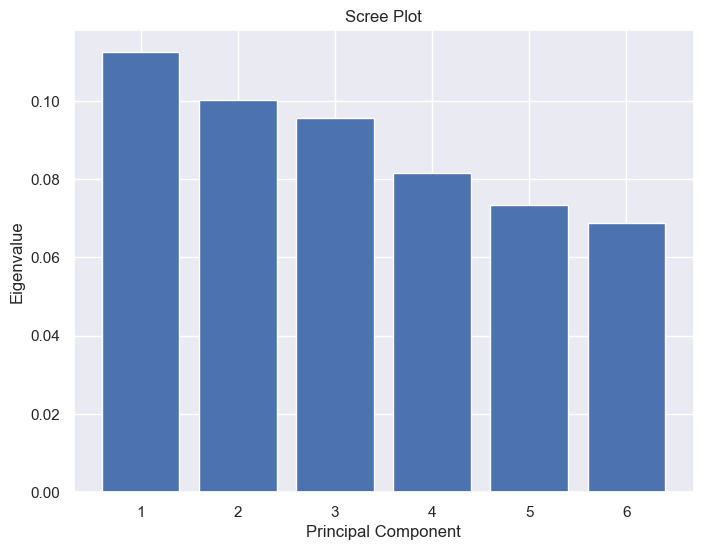

In [32]:
# Plot the scree plot
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(eigenvalues) + 1), eigenvalues)
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.show()


In [33]:
X = engine[['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure','lub oil temp', 'Coolant temp']]
Y = engine['Engine Condition']

In [34]:
#we split the test and training data for modeling

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = 42, test_size = 0.3)

x_train.shape, x_test.shape

((13674, 6), (5861, 6))

In [35]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

In [36]:
x_train_transform = ss.fit_transform(x_train)
x_test_transform = ss.transform(x_test)

In [37]:
x_test_transform

array([[-0.41052   , -0.88649696, -0.73093798,  0.48786896, -0.44282268,
        -1.37641841],
       [-0.69752909,  2.11477792, -0.07434218,  3.24812582, -1.42261053,
        -0.57276469],
       [-0.49997738,  0.13100978, -1.07112294, -0.63431753,  3.35378032,
         0.03484972],
       ...,
       [ 0.53250986, -0.92483833, -0.4852184 ,  0.19767859,  1.82071589,
        -0.12187683],
       [ 0.44677987, -1.08808947,  0.66855924,  4.8761638 , -0.50461387,
        -1.07637977],
       [ 0.87542981,  0.87751269, -0.28027316,  0.22371507, -0.5630289 ,
         0.04005071]])

# Model training and evaluation

# 1. Random Forest Regressor

In [38]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion= 'entropy', max_depth= 10, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 140)
rand_clf.fit(x_train, y_train)

y_pred = rand_clf.predict(x_test)

In [39]:
x_train, x_test, y_train, y_test

(       Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
 12710         820          3.608192       3.519850          2.284361   
 3763          484          2.828648       6.670412          6.307960   
 79            795          3.656956       6.081633          4.643739   
 4561          729          2.523225       6.335174          2.078462   
 18341         499          3.004559       7.097337          1.478411   
 ...           ...               ...            ...               ...   
 11284         681          3.598792       7.300853          1.083391   
 11964         580          2.243040       5.242489          1.471350   
 5390          616          3.310048       3.787693          6.001031   
 860          1163          2.731726       3.703595          2.951684   
 15795         695          2.515089       6.355462          2.688567   
 
        lub oil temp  Coolant temp  
 12710     75.344219     75.034982  
 3763      75.227334     71.518642  
 79        

Training accuracy of Random Forest is : 0.7660523621471406
Test accuracy of Random Forest is : 0.6585906841835865
[[ 741 1473]
 [ 528 3119]]
              precision    recall  f1-score   support

           0       0.58      0.33      0.43      2214
           1       0.68      0.86      0.76      3647

    accuracy                           0.66      5861
   macro avg       0.63      0.59      0.59      5861
weighted avg       0.64      0.66      0.63      5861



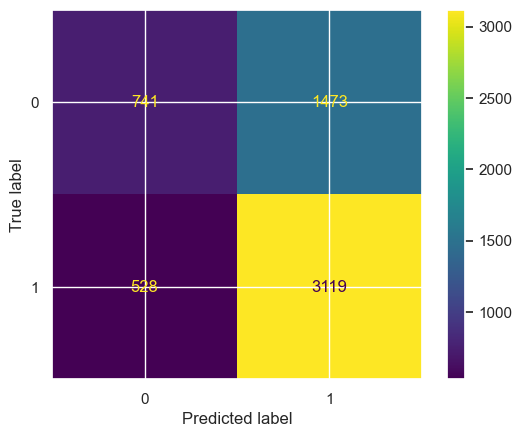

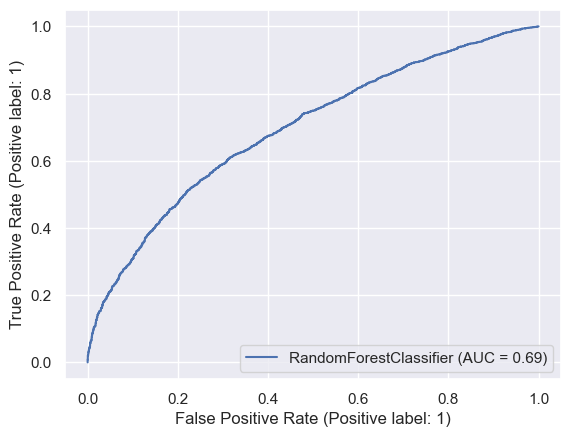

In [40]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,plot_confusion_matrix,plot_roc_curve

rand_clf_train_acc = accuracy_score(y_train, rand_clf.predict(x_train))
rand_clf_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Random Forest is : {rand_clf_train_acc}")
print(f"Test accuracy of Random Forest is : {rand_clf_test_acc}")

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))
plot_confusion_matrix(rand_clf, x_test,y_test)
plot_roc_curve(rand_clf, x_test,y_test)
     

# Hypertuning the parameters

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = 0, test_size = 0.2)

x_train.shape, x_test.shape

((15628, 6), (3907, 6))

In [42]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion= 'entropy', max_depth= 10, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 140)
rand_clf.fit(x_train, y_train)

y_pred = rand_clf.predict(x_test)

Training accuracy of Random Forest is : 0.7627975428717686
Test accuracy of Random Forest is : 0.6718710007678526
[[ 515  896]
 [ 386 2110]]
              precision    recall  f1-score   support

           0       0.57      0.36      0.45      1411
           1       0.70      0.85      0.77      2496

    accuracy                           0.67      3907
   macro avg       0.64      0.61      0.61      3907
weighted avg       0.65      0.67      0.65      3907



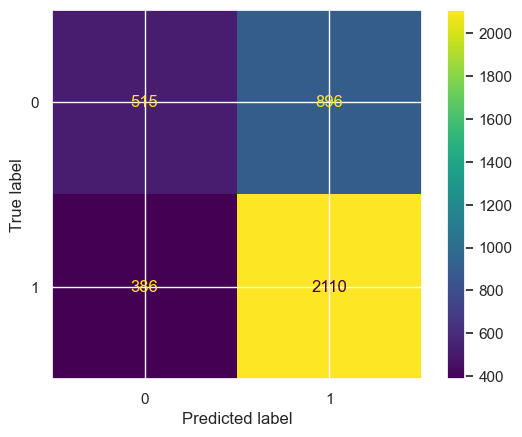

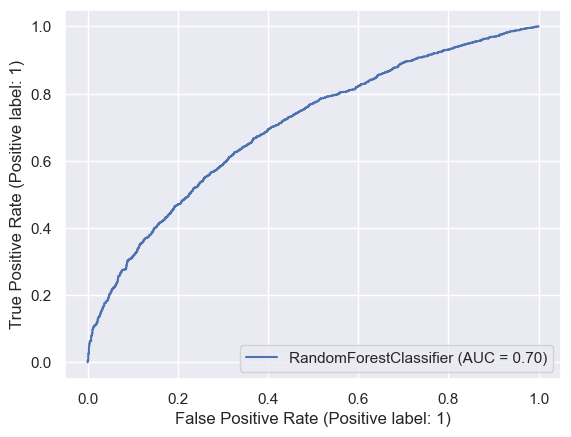

In [43]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,plot_confusion_matrix,plot_roc_curve

rand_clf_train_acc = accuracy_score(y_train, rand_clf.predict(x_train))
rand_clf_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Random Forest is : {rand_clf_train_acc}")
print(f"Test accuracy of Random Forest is : {rand_clf_test_acc}")

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))
plot_confusion_matrix(rand_clf, x_test,y_test)
plot_roc_curve(rand_clf, x_test,y_test)
     

            Feature  Importance
0        Engine rpm    0.364817
2     Fuel pressure    0.162258
4      lub oil temp    0.138063
1  Lub oil pressure    0.123322
3  Coolant pressure    0.106854
5      Coolant temp    0.104685


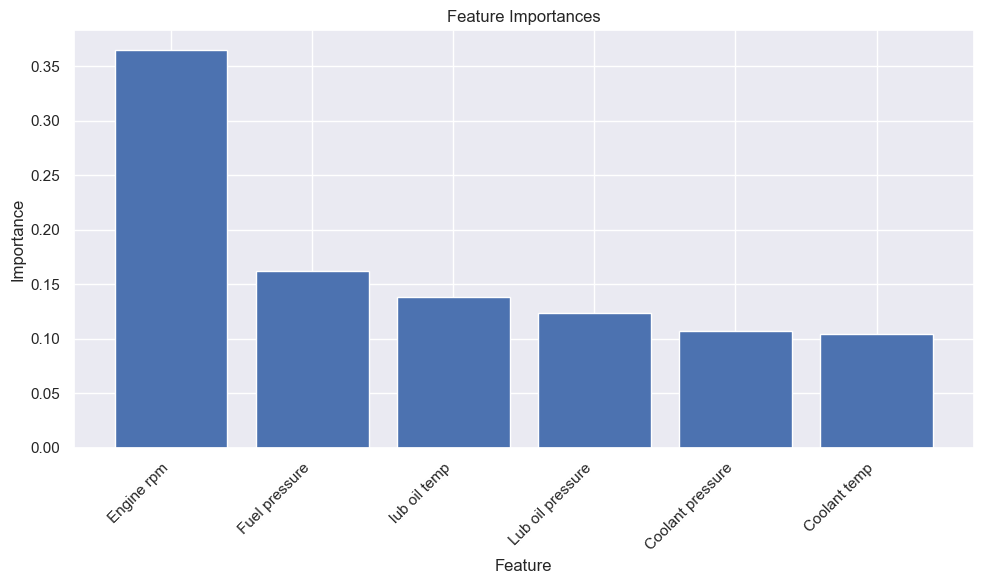

In [44]:
# Get important features
feature_importances = rand_clf.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the importance DataFrame
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()


# 2. SVM

In [45]:
#we split the test and training data for modeling

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y,test_size = 0.2,  random_state=42 )
print('Length of X Train :', len(X_Train) )
print('Length of X Test  :', len(X_Test) )


Length of X Train : 15628
Length of X Test  : 3907


In [46]:
#we apply support vector machine algorithm we use SVC(support vector classifier) module in SVM

from sklearn.svm import SVC

svc = SVC()
svc.fit(X_Train, Y_Train)

y_pred = svc.predict(X_Test)
     

SVM classifier Training accuracy : 0.6474276938827745
SVM classifier testing accuracy : 0.6347581264397236
[[ 258 1201]
 [ 226 2222]]
              precision    recall  f1-score   support

           0       0.53      0.18      0.27      1459
           1       0.65      0.91      0.76      2448

    accuracy                           0.63      3907
   macro avg       0.59      0.54      0.51      3907
weighted avg       0.61      0.63      0.57      3907



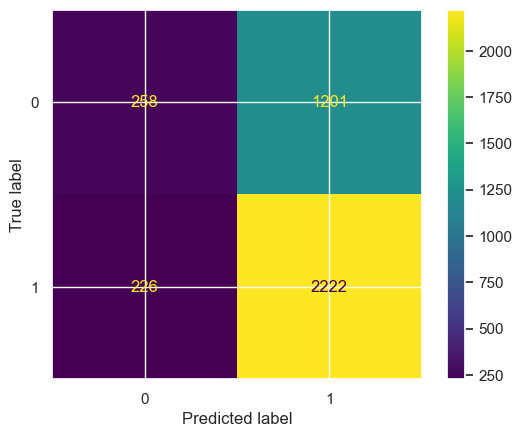

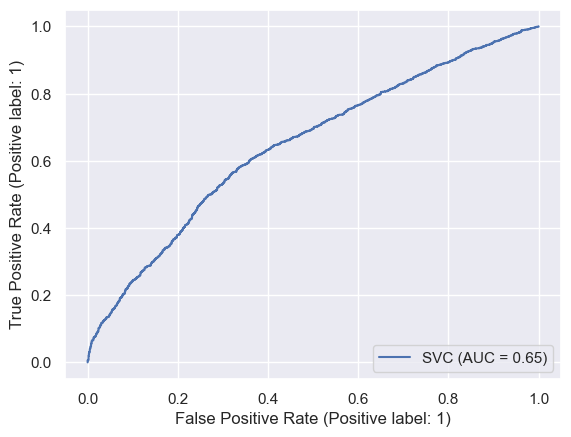

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,plot_confusion_matrix,plot_roc_curve


svc_train_accuracy = accuracy_score(Y_Train, svc.predict(X_Train))#training accuracy score
svc_test_accuracy = accuracy_score(Y_Test, y_pred)#testing accuracy score

print(f"SVM classifier Training accuracy : {svc_train_accuracy}")#print Training accuracy
print(f"SVM classifier testing accuracy : {svc_test_accuracy}")#print testing accuracy


print(confusion_matrix(Y_Test, y_pred))#print confusion matrix
print(classification_report(Y_Test, y_pred))#print summary
plot_confusion_matrix(svc, X_Test,Y_Test)#plot confusion matrix
plot_roc_curve(svc, X_Test,Y_Test)#plot ROC curve

# SVM Model with Oversample

In [48]:
#importing smote library

from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [49]:

## RandomOverSampler is used  to handle imbalanced data

from imblearn.over_sampling import RandomOverSampler
from collections import Counter
     

In [50]:

#taking random num
ros = RandomOverSampler(random_state=42)

In [51]:
#fitting training model
X_train_result, y_train_result = ros.fit_resample(X, Y)
     

In [52]:
#check the shape of the model
#there is increase in the number of data size to balance the over all dataset
X_train_result.shape,y_train_result.shape

((24634, 6), (24634,))

In [53]:

#showing the shape of the dataset before and after the smote, we see the balanced train data now
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_train_result)))

Original dataset shape Counter({1: 12317, 0: 7218})
Resampled dataset shape Counter({1: 12317, 0: 12317})


In [54]:
#splitting data in train and test
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_train_result,y_train_result,test_size = 0.2,  random_state=42 )
print('Length of X Train :', len(X_Train) )
print('Length of X Test  :', len(X_Test) )

Length of X Train : 19707
Length of X Test  : 4927


In [55]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_Train, Y_Train)

y_pred = svc.predict(X_Test)

Training accuracy of Support Vector Classifier is : 0.6246511391891206
Test accuracy of Support Vector Classifier is : 0.6277653744672215
SVM cohen_kappa_score : 0.2560409247893214
[[1673  775]
 [1059 1420]]
              precision    recall  f1-score   support

           0       0.61      0.68      0.65      2448
           1       0.65      0.57      0.61      2479

    accuracy                           0.63      4927
   macro avg       0.63      0.63      0.63      4927
weighted avg       0.63      0.63      0.63      4927



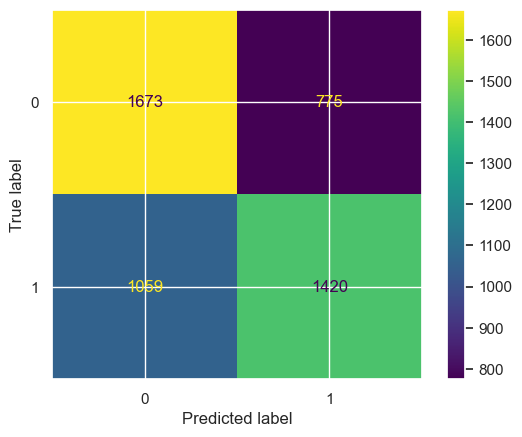

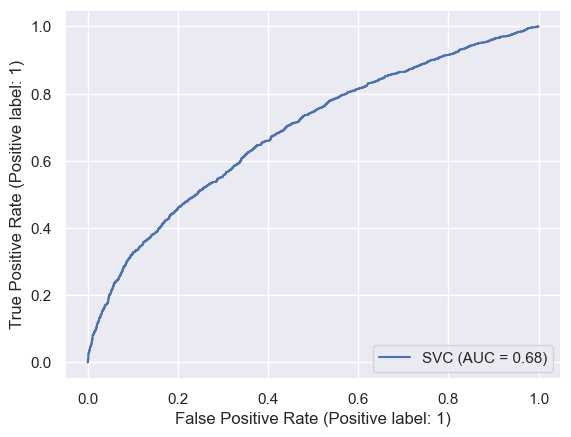

In [56]:
# classification_report accuracy_score  and  confusion_matrix

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import cohen_kappa_score
svc_train_acc = accuracy_score(Y_Train, svc.predict(X_Train))
svc_test_acc = accuracy_score(Y_Test, y_pred)
cohen_kappa = cohen_kappa_score(Y_Test, y_pred)

print(f"Training accuracy of Support Vector Classifier is : {svc_train_acc}")
print(f"Test accuracy of Support Vector Classifier is : {svc_test_acc}")
print(f"SVM cohen_kappa_score : {cohen_kappa}")

print(confusion_matrix(Y_Test, y_pred))
print(classification_report(Y_Test, y_pred))
plot_confusion_matrix(svc, X_Test,Y_Test)
plot_roc_curve(svc, X_Test,Y_Test)